## Алгоритм Метрополиса-Гастингcа ##

### Вопрос 1. Зачем? ###

Один из основных интсрументов машинного обеспечения - теорема Баеса, все мы ее прекрасно знаем:

$$ p(\theta | D) = \frac{p(\theta)p(D | \theta)}{p(D)}$$ 
Где:
* $ D $ - данные<br>
* $ \theta $ - параметры модели, которые хотим обучить<br>
* $ p(D|\theta) $ - <em>апострериарная вероятность</em> - определение вероятностей параметров модели после того, как мы приняли во внимание данные<br>
* $ p(\theta | D) $ - <em>правдоподобие</em> - вероятность данных при условии зафиксированных параметров модели <br>
* $ p(\theta) $ - <em>априорная вероятность</em> - формализацией того, что мы знали раньше, ещё до всяких экспериментов
<br><br>

После того, как найдём $p(\theta|D)$, мы хотим предсказать новые значения переменных:

$$p(y| D) = \int p(y|\theta )p(\theta|D)d\theta$$

И в общем, поставленная нами задача машинного обучения так или иначе сводятся к тому, чтобы подсчитать математическое ожидание разных функций при условии сложного распределения, в которую подставлены значения некоторых переменных:

$$p(x)=p(x_{1},x_{2},...,x_{n})$$

И вроде всё так просто — умножили две функции, максимизировали результат — что такого? <br>
Проблема заключается в том, **что распределения, которые нас интересуют, обычно слишком сложные, чтобы их можно было максимизировать напрямую, аналитически. В них слишком много переменных, между переменными слишком сложные связи**





Чтобы было понятно,что не так - **пример**:<br><br>
Мы хотим рассортировать по темам новостей на основе уже имеющейся базы данных с темами: спорт, экономика, культура и т.д. ( все мы помним этот датасет).<br><br> 
Используем bag-of-words то есть новость теперь это множество слов, которые в нёй содержатся => В результате каждая новость $x$ принимает значения из множества категорий $V$ и описывается атрибутами:  $(a_{1},a_{2},...,a_{n})$

**Попытемся применить формулу Баеса на прямую:**<br><br>
Нам нужно найти наиболее вероятное значение данного атрибута, т.е.:

$$ \underset{v\in V}{arg max}(p(x=v|a_{1},a_{2},...,a_{n}))$$

По теореме Баеса получаем:<br>
$$\underset{v\in V}{arg max}\frac{p(a_{1},a_{2},...,a_{n}|x=v)p(x=v)}{p(a_{1},a_{2},...,a_{n})} =\underset{v\in V}{arg max}{(p(a_{1},a_{2},...,a_{n}|x=v)p(x=v)) }$$
Где:
* $p(x=v)$ - частоту встречаемости слова
* $p(a_{1},a_{2},...,a_{n}|x=v)$ - вероятность в точности такого набора слов в сообщениях на разные темы - очевидно, такой статистики взять неоткуда
<br><br>

Поэтому делается предположение о независимости слов при условии темы то есть разные слова в тексте на одну и ту же тему появляются независимо друг от друга:

$$p(a_{1},a_{2},...,a_{n}|x=v)=p(a_{1}|x=v)p(a_{2}|x=v)...p(a_{n}|x=v)$$

В этой трактовке уже все найти возможно - обучаем параметры каждого маленького распределения по отдельности, а затем выбраем $v$, дающее максимум произведения<br><br><br><br>
**Окей, вроде понятно в чём проблема,а как его можно еще решать?<br>
-Сэмплирование.**

### Вопрос 2. Сэмплирование? ###


**<em>Cуть</em>**: мы не пытаемся вычислить нашу метрику на всем массиве данных, а берем подмножество, которое репрезентативно представляет нам нужные метрики. Это сэмпл может быть в 1000 раз меньше нашего массива данных, но при этом достаточно хорошо показывать нужные нам цифры.
<br><br>**<em>Идея применимо к нашей проблема:</em>** всё, что нам нужно, выражается в виде мат.ожиданий разнообразных функций по сложному распределению $p(x)$.Возьмем случайные точки по нашему распределению $x_{1},x_{2},...,x_{n}$ , тогда мат.ожидание любой функции можно апроксимировать как среднее арифметиическое в выбранных точках:

$$\mathbb{E} |f(x)|=\int f(x)p(x)dx\approx \frac{1}{R} \sum_{r=1}^{R}f(x^{r})$$

Вот и всё,вся задача фактически сводится к тому, чтобы научиться сэмплировать точки по распределению при условии, что мы можем в любой точке считать значение этого распределения.<br><br>
**Тонкости?**
* **Проклятие размерности:** если пространство размерности 1 считаем 10 значений функции, чтобы разбить интервал на отрезки по 0.1,а если пространство размерности 100?
* **Пропорциональная функция:** на самом деле мы считаем не значение $p(x)$, а значение $p^{*}(x)$,a точное значение вероятности можно просто подсчитать, нормализовав полученное распределение так, чтобы оно суммировалось в единицу (всё как в Наивном Баисе, там для этого и есть знаминатель).<br>**Однако это как раз и есть та сложная задача, которую мы сейчас пытаемся научиться решать: просуммировать все значения сложного распределения,поэтому мы не можем рассчитывать на значение истинных вероятностей, только на некоторую пропорциональную им функцию $p^{*}(x)$.**


### Вопрос 3. Сэмплирование на практике это как? ###

**Идея:** если равномерно выбрать точку под графиком функции плотности распределения $p(x)$, то её $x$-координата будет взята по распределению $p(x)$.<br><br>
Возьмём плотность распределения длины чашелистник, классически пример!

In [437]:
import re
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
from sklearn import datasets
from scipy.stats import norm
from itertools import product
import matplotlib.pyplot as plt
from collections import Counter


In [438]:
iris = datasets.load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

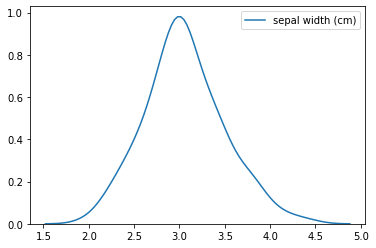

In [439]:
snsplot = sns.kdeplot(data['sepal width (cm)'], shade=False)
fig = snsplot.get_figure()

Вот у нас есть график распределение длины чашелистника, а дальше-то что? как строить?!

### Алгоритм Метрополиса-Гастингcа <br>
**Что это вообще:**<br> Алгоритм есть моделирование Цепи Маркова с некоторым стационарным распределнием.
<br>В конечном итоге выборки из построенной Цепи Маркова выглядят как выборки из этого распределения.
<br>Основное ограничение алгоритма - для сложных задач в долгосрочной перспективе может означать очень длительное время вычисления.

### Часть I. Ядро перехода ###


Чтобы реализовать алгоритм Метрополиса-Гастингса нам необходимо определить ядро перехода $Q$,мы его определяем САМИ.
<br> 
**Ядро перехода** - это просто способ случайного перемещения в новую позицию в пространстве (скажем, y), учитывая текущую позицию (скажем, x), то есть $Q$ - распределение по y для заданного x: 

$$Q =Q(y|x)$$

В своем большинсте, $Q$ - непрерывное распределение, то есть $Q(y|x)$ - плотность распределениея на y и поэтому $\forall x: \int Q(y|x)dy = 1$<br><br>
Проще всего получить следущую точку $y$ по текущей $x$ добавить к ней число выбранное по нормальному распределению $N(0,1)$:

$$y=x+ N(0,1) $$

Тогда получим, ядро "Случайного блуждания" (random walk) :
$$ Q(y|x) = \frac{1}{\sqrt{2\pi}}e^{-0.5*(y-x)^{2}} $$

### Часть II. Псевдокод Алгоритма ###


1. Берем совершенно случайным образом первую точку: $X_{1}=x_{1}$
2. Для $t=1,2,..$:
    * Выбираем место для перехода, то есть высчитываем $y$ из $Q(x|y)$
    * Оцениваем подходит ли выбранное место для перехода, оно должно "лучше объяснять данные" то есть высчитываем "вероятность принятия": $$ A = min(1,\frac{p(y)Q(x_{t}|y)}{p(x_{t})Q(y|x_{t})} )$$
    * С вероятностью $A$ мы принимаем предлженное место и устанавливаем $x_{t+1} = x_{t}+y$, иначе $x_{t+1}=x_{t}$

### Часть III. Пробуем запрогать относительно выборки с нормальным распределением, чтобы сравнить с аналитическим решением ###

In [440]:
def sampler(data, samples=4, x_init=.5, mean=0, std=1, proposal_width=.5, plot=False):
    x_current = x_init
    posterior = [x_current]
    for i in range(samples):
        # Выбираем место для перехода
        x_proposal =  norm(x_current, proposal_width).rvs()

        # высчитываем функцию правдоподобия в текущей и предложенной точке - p(y),p(x)
        likelihood_current = norm(x_current, 5).pdf(data).prod()
        likelihood_proposal = norm(x_proposal, 5).pdf(data).prod()
        
        # высчитываем вероятность текущей и предложенной точки        
        prior_current = norm(mean,std).pdf(x_current)
        prior_proposal = norm(mean, std).pdf(x_proposal)
        
        p_current = likelihood_current * prior_current
        p_proposal = likelihood_proposal * prior_proposal
        
        # высчитваем вероятность принятия
        p_accept = p_proposal / p_current
        accept = np.random.rand() < p_accept
        
        if plot:
            plot_proposal(x_current, x_proposal, data,mean,std, accept, posterior, i)
        
        if accept:
            # Делаем шаг
            x_current = x_proposal
        
        posterior.append(x_current)
        
    return np.array(posterior)

In [441]:
def plot_proposal(x_current, x_proposal, data,mean,std, accepted, trace, i):
    from copy import copy
    trace = copy(trace)
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(16, 4))
    fig.suptitle('sample %i' % (i + 1))
    x = np.linspace(1, 5, 5000)
    color = 'g' if accepted else 'r'
        

    prior_current = norm(mean,std).pdf(x_current)
    prior_proposal = norm(mean, std).pdf(x_proposal)
    prior = norm(mean, std).pdf(x)
    ax1.plot(x, prior)
    ax1.plot([x_current] * 2, [0, prior_current], marker='o', color='b')
    ax1.plot([x_proposal] * 2, [0, prior_proposal], marker='o', color=color)
    ax1.annotate("", xy=(x_proposal, 0.2), xytext=(x_current, 0.2), arrowprops=dict(arrowstyle="->", lw=2.))
    ax1.set(ylabel='Распределение вероятности', title='current: aprior(x=%.2f) = %.2f\nproposal: aprior(x=%.2f) = %.2f' % (x_current, prior_current, x_proposal, prior_proposal))
    

    likelihood_current = norm(x_current, 5).pdf(data).prod()
    likelihood_proposal = norm(x_proposal, 5).pdf(data).prod()
    y = norm(loc=x_proposal, scale=1).pdf(x)
    sns.distplot(data, kde=False, norm_hist=True, ax=ax2)
    ax2.plot(x, y, color=color)
    ax2.axvline(x_current, color='b', linestyle='--', label='x_current')
    ax2.axvline(x_proposal, color=color, linestyle='--', label='x_proposal')
    ax2.annotate("", xy=(x_proposal, 0.2), xytext=(x_current, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2.))
    ax2.set(title='likelihood(x=%.2f) = %.2f\nlikelihood(x=%.2f) = %.2f' % (x_current, 1e14*likelihood_current, x_proposal, 1e14*likelihood_proposal))
    
    posterior_analytical = calc_posterior_analytical(data, x, mean, std)
    ax3.plot(x, posterior_analytical)
    posterior_current = calc_posterior_analytical(data, x_current, mean, std)
    posterior_proposal = calc_posterior_analytical(data, x_proposal, mean, std)
    ax3.plot([x_current] * 2, [0, posterior_current], marker='o', color='b')
    ax3.plot([x_proposal] * 2, [0, posterior_proposal], marker='o', color=color)
    ax3.annotate("", xy=(x_proposal, 0.2), xytext=(x_current, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2.))
    ax3.set(title='posterior(x=%.2f) = %.5f\nposterior(x=%.2f) = %.5f' % (x_current, posterior_current, x_proposal, posterior_proposal))
    
    if accepted:
        trace.append(x_proposal)
    else:
        trace.append(x_current)
    ax4.plot(trace)
    ax4.set(xlabel='sample', ylabel='x', title='trace')
    plt.tight_layout()

In [442]:
def calc_posterior_analytical(data, x, mu_0, sigma_0):
    sigma = 5.
    n = len(data)
    mu_post = (mu_0 / sigma_0**2 + data.sum() / sigma**2) / (1. / sigma_0**2 + n / sigma**2)
    sigma_post = (1. / sigma_0**2 + n / sigma**2)**-1
    return norm(mu_post, np.sqrt(sigma_post)).pdf(x)

**Визуализируем шаги алгоритма:**
* **В первом столбце** - априорное распределение вероятностей, то есть – наши предположения относительно $x_{t}$ до ознакомления с данными.
<br>Распределение не меняется, показываем здесь предложения нового значения $x_{t}$.<br>
Синии линии - текущее положение, зеленые и красные - принятые и отвергнутые предложенные местополодения соответственно.
* **Во втором столбце** – функция правдоподобия и вероятность принятия предложенной точки.
<br>График меняется в соответствии с предлагаемым $x_{t}$.
<br>Cиняя гистограмма – сами данные.
<br>Cплошная линия выводится либо зелёным, либо красным цветом – это график функции правдоподобия при $x_{t}$, предложенном на текущем шаге. 
<br>Чем сильнее функция правдоподобия соответствует гистограмме данных – тем лучше модель объясняет данные и тем выше будет результирующая вероятность
<br>Пунктирная линия зеленого цвета – это предложенный $x_{t}$, пунктирная синяя линия – это текущий $x_{t}$.
* **В третьей колонке** – нормализованное апостериорное распределение вероятностей
* **В четвёртой колонке** - след выборки,то есть – значения $x_{t}$, сэмплы, полученные на основе модели. Здесь мы показываем каждый сэмпл, вне зависимости от того, был ли он принят или отвергнут (в таком случае линия не меняется).

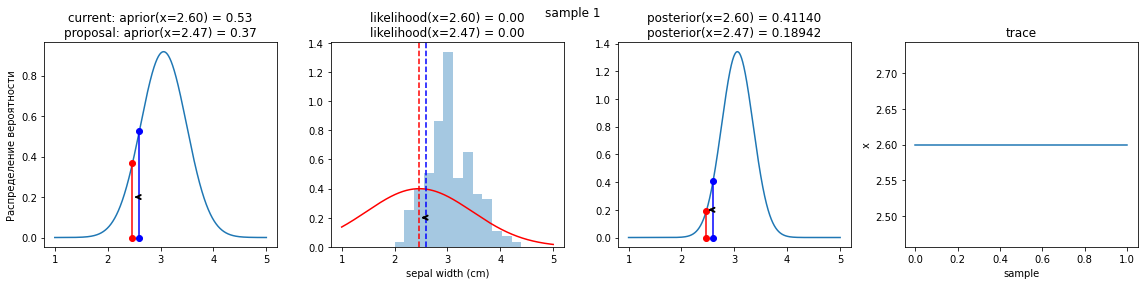

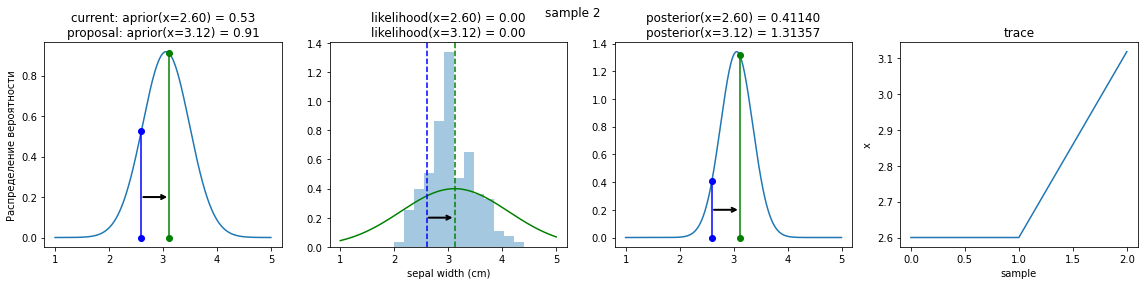

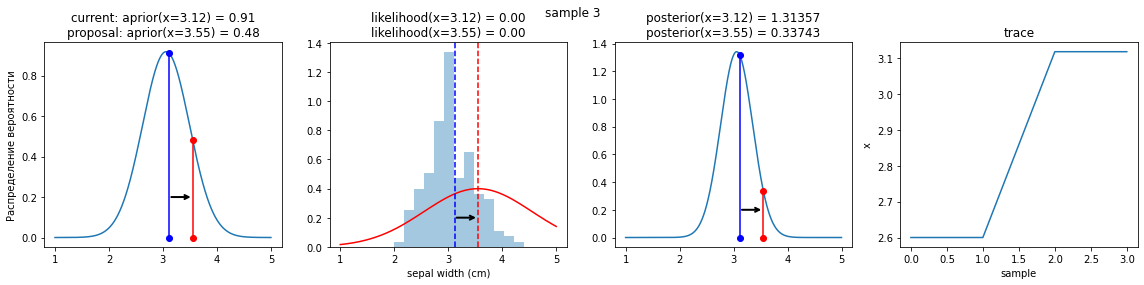

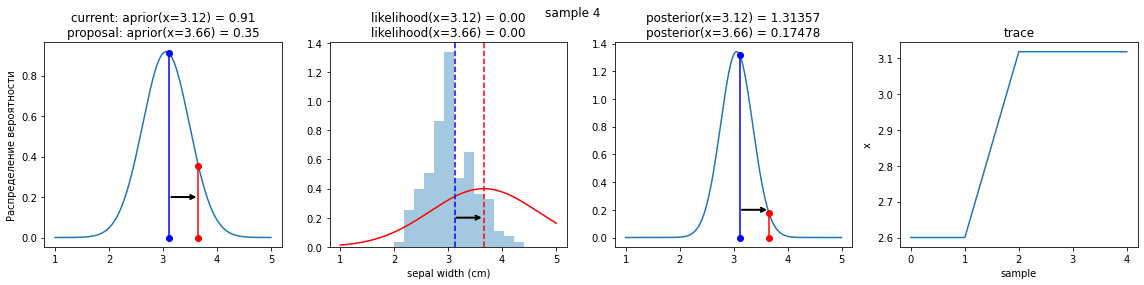

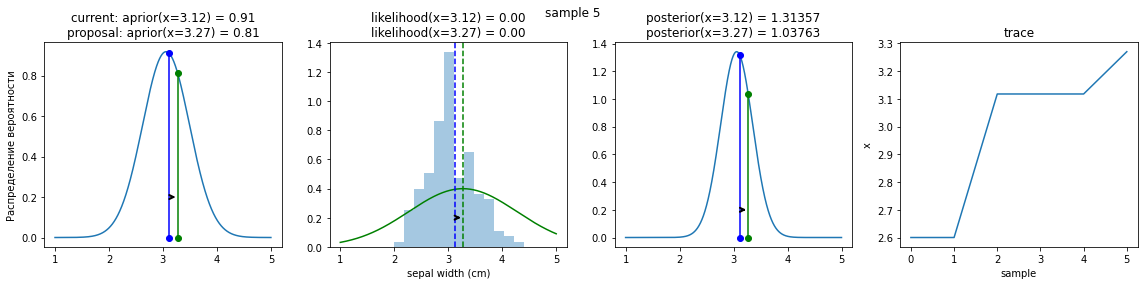

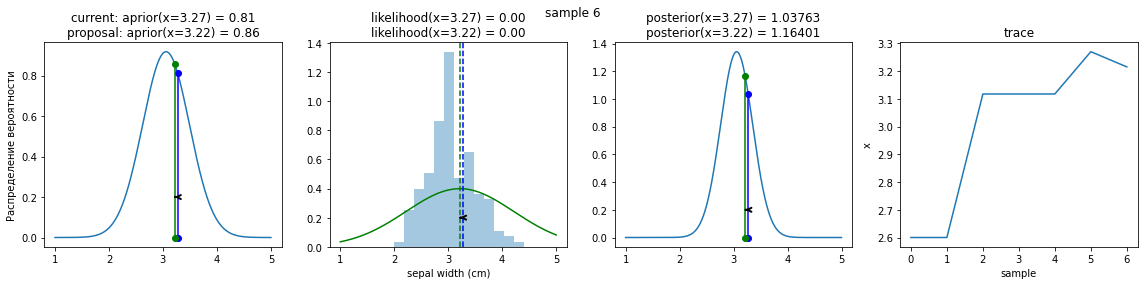

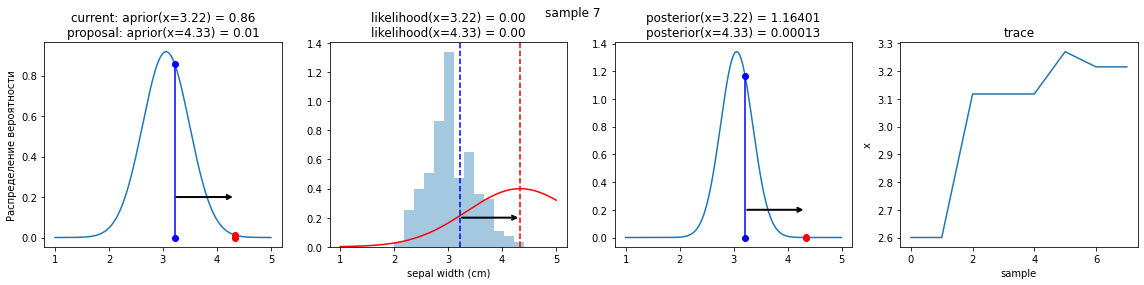

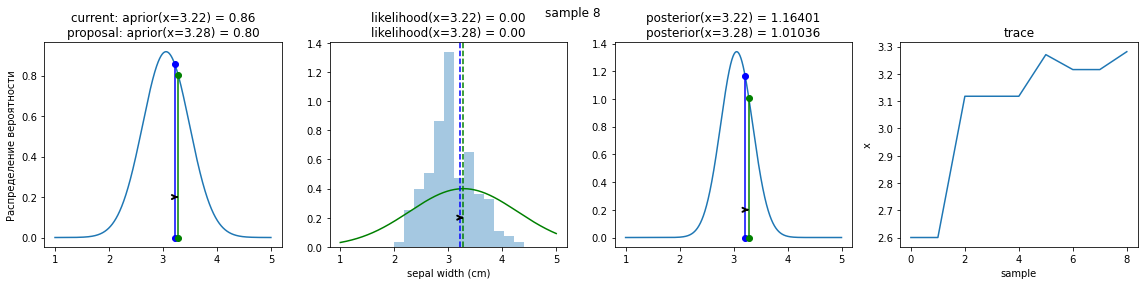

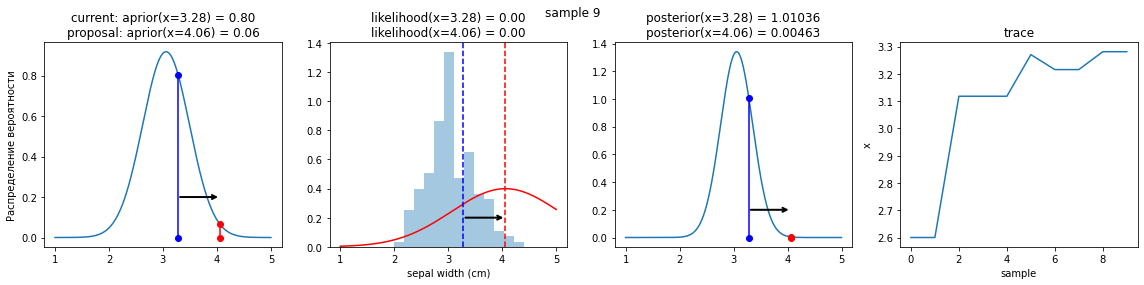

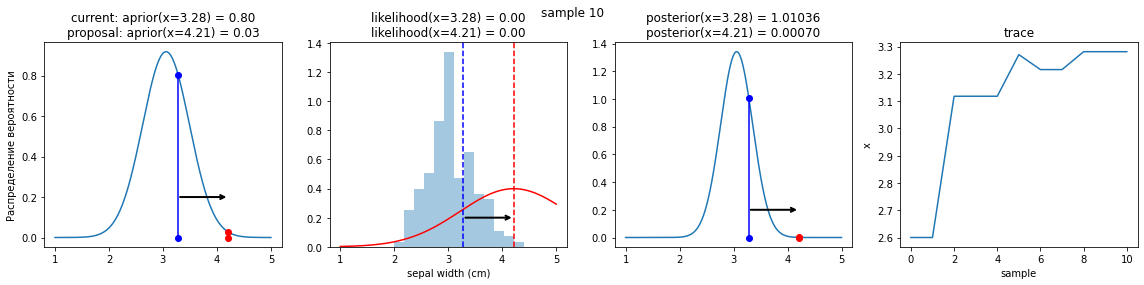

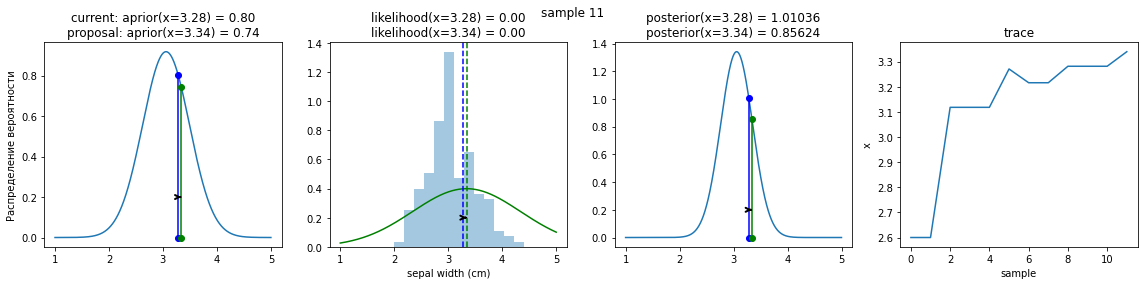

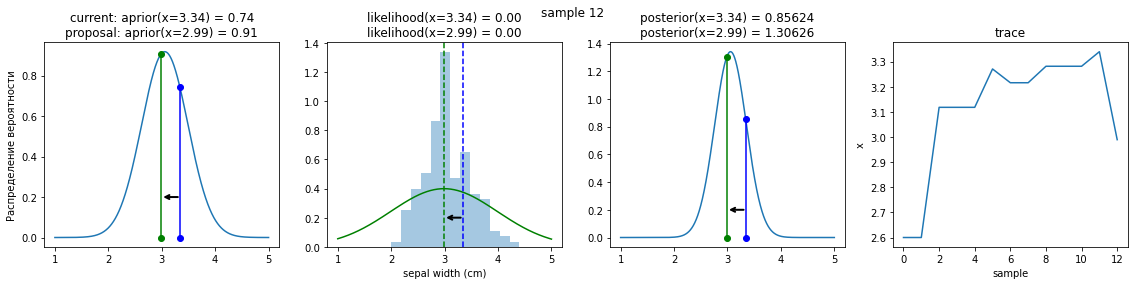

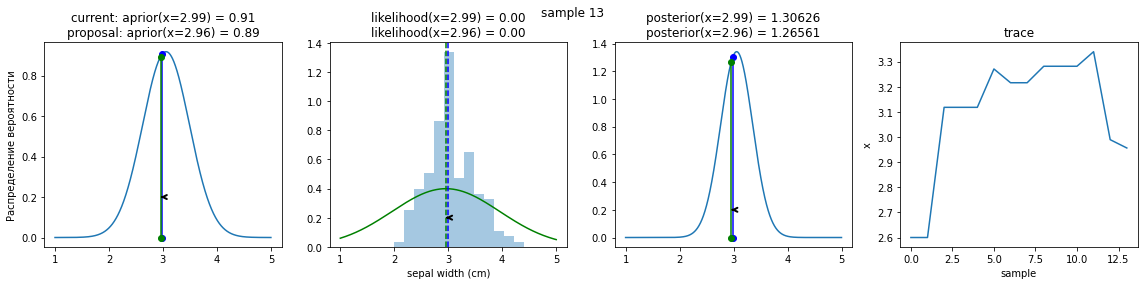

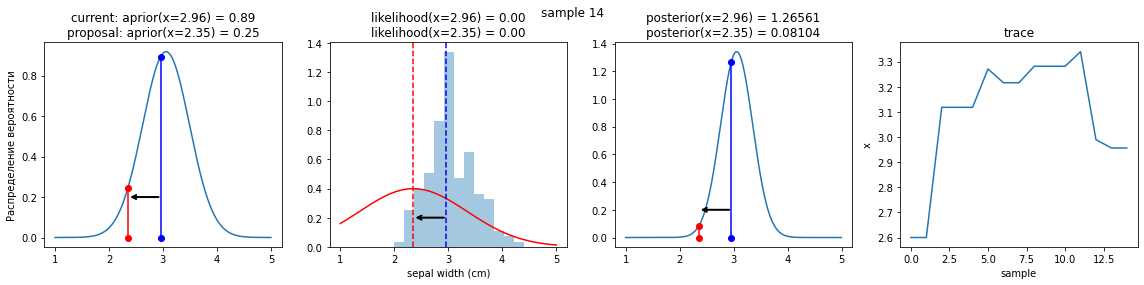

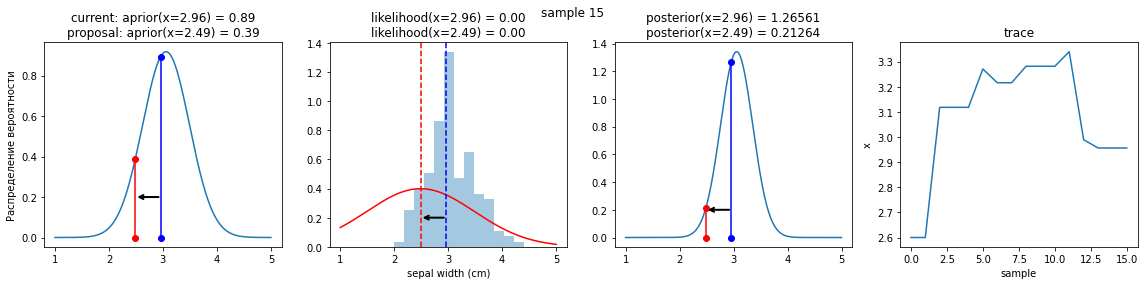

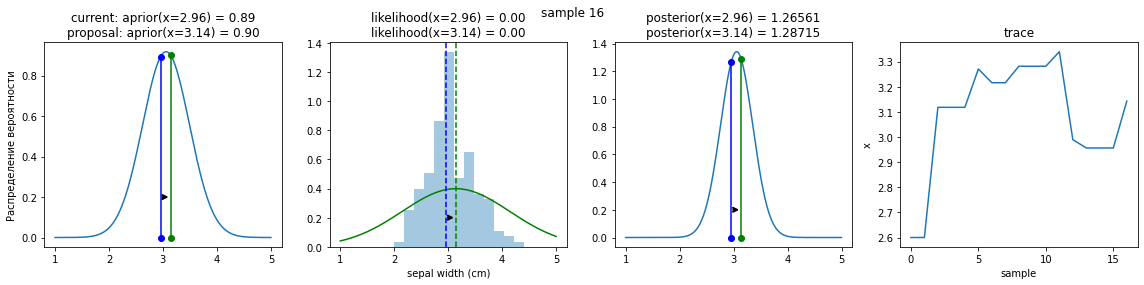

In [443]:
sampler(data['sepal width (cm)'], samples=16,x_init=2.6,mean=np.mean(data['sepal width (cm)']) ,std=np.std(data['sepal width (cm)']),plot=True);

**И что? Как это поможет нам найти собственно то, что надо, апостериарную вероятность?**<br>
Посмотрим на след выборки- данные,которые производит система,сгенерируем большое количество сэмплов и глянем на них:

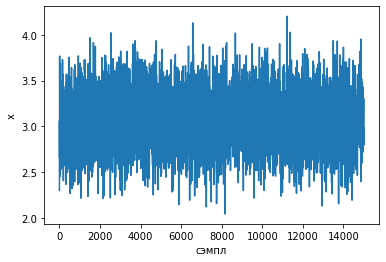

In [444]:
posterior = sampler(data['sepal width (cm)'], samples=15000, x_init=2.3,mean=np.mean(data['sepal width (cm)']) ,std=np.std(data['sepal width (cm)']))
fig, ax = plt.subplots()
ax.plot(posterior)
_ = ax.set(xlabel='сэмпл', ylabel='x');

Чтобы получить приближённое значение апостериорного распределения вероятностей, достаточно построить гистограмму этих данных.<br> Важно помнить, что, хотя полученные данные похожи на те, сэмплированием которых мы занимались для подгонки модели, это два разных набора данных!!!!<br><br>
Слёдующий график показывает, каким должно быть x:<br>
Так как я выбрал выборку с нормальным распределением, то получили ожидаемый вид, аналитическое решение подтверждает то, что я правильно приминил сэмплирование

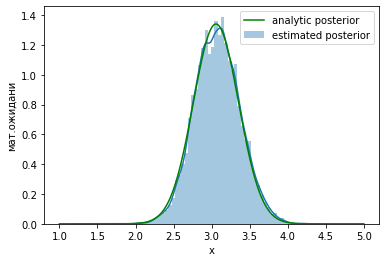

In [445]:
ax = plt.subplot()
sns.distplot(posterior[500:], ax=ax, label='estimated posterior')
x = np.linspace(1, 5, 5000)
post = calc_posterior_analytical(data['sepal width (cm)'], x ,np.mean(data['sepal width (cm)']), np.std(data['sepal width (cm)']))
ax.plot(x, post, 'g', label='analytic posterior')
_ = ax.set(xlabel='x', ylabel='мат.ожидани');
ax.legend();

### Часть IV. Особенности Алгоритма Метрополиса-Гастингса ###

* Необходимо делать **burn in** перед применением, на случай, если начальное положение выбрано не удачно - n-ое (обычно 1000) кол-во сэмплов, которые не будут учитываться 
* По-хорошему, берут каждый **n**-ый сэмпл, где **n** подбирается эмпирическим путем, исходя из реально получающейся автокорреляции в последовательности сэмплов (поскольку нам нужны независимые сэмплы, а если брать каждый, то следующая точка блуждания заведомо лежит рядом с предыдущей)
* Метрополис-Гастингс меньше всего подвержен проклятию размерностей, чем другие алгоритмы MCMC

**Вывод:** MCMC позволяют применять байесовский метод в тех случаях, когда апостериорное распределение не является одним из известных, то есть когда выбрано особенное априорное распределение или распределение данных при фиксированном выборе параметров

## Самое время попоробовать алгоритм Метрополиса-Гастингса на практике: ##

### Часть I. На что способен сам алгоритм ###

In [446]:
def is_rus(char):
    return 1072 <= ord(char) <= 1103 or char == ' ' or ord(char) == 1105

def clean_text(s):
    cleared_s = ''.join(ch if ch != '\n' else ' ' for ch in s.lower() if is_rus(ch) or ch == ' ' or ch == '\n')
    return re.sub(' +', ' ', cleared_s)
    
def encrypt_text(text, symbol_pool = list('⨒⨓⨔⨕⨖⊣⊢⊥⊤ℕℤℚℝℂ∅⊂⊃⊄⊅⊩⊮⊫⊯⊪⊨⊭∀∃∄⊲⊳⊴⊵⋪⋫⋬⋭≍≭≣≺≻≼≽≾≿∈∋∉∌⊞⊟⊠⊡')):
    text_chars = sorted(list(set(text)))
    new_chars = np.random.choice(symbol_pool, len(text_chars), replace=False)
    replace_map = dict(zip(text_chars, new_chars))
    return ''.join(replace_map[ch] for ch in text)

def get_message(name, length=None):
    text = open('test_messages/' + name + '.txt', 'r', encoding='utf8').read()
    initial = clean_text(text).strip()[:length]
    encrypted = encrypt_text(initial)
    return initial, encrypted
    
def train_model(corpus):
    cnt_1 = Counter()
    cnt_2 = Counter()
    with open(corpus, 'r', encoding='utf8') as file:
        for line in file:
            line = clean_text(line)
            if line:
                for i in range(len(line) - 1):
                    if is_rus(line[i]):
                        cnt_1[line[i]] += 1
                        if is_rus(line[i + 1]):
                            cnt_2[line[i:i + 2]] += 1
                if is_rus(line[-1]):
                    cnt_1[line[-1]] += 1
    alphabet = [item[0] for item in cnt_1.most_common()]
    m = {}
    for ch1, ch2 in product(alphabet, repeat=2):
        m[ch1 + ch2] = np.log(cnt_2[ch1 + ch2] + 1)
    return alphabet, m

In [447]:
alphabet, model = train_model('война_и_мир.txt')

In [448]:
class MetropolisHastingsDecryptor:
    def __init__(self ,alphabet ,m ,naive=False):
        self.alphabet = alphabet # символы алфивита, упорядоченые по убыванию
        self.m = m  # матрица переходов - словарь на котором тренировались
        self.naive = naive # если True, то будем принимать замены, увеличивающие score - наивный подход к оптимизации т.е. отказ от алгоритма Метрополиса-Гастингса,чтобы посмотреть, что выйдет
        self.symbols = []
        self.text = ''
        self.log_score = 0
        self.best_score = 0
        self.map = {} # сивол -> буква/пробел 
        self.best_map = {}
        self.accept_history = [] # принимали замену или нет, Булев массив
        self.score_history = [] # какие были пути
        
    # правдоподобие считаем:
    #  переписать в numpy jперации
    def get_score(self ,cur_map):
        m_values = np.zeros(len(self.text)-1,dtype = np.float64)
        for i in range(len(self.text) - 1):
            pair = ''.join(cur_map[ch] for ch in self.text[i:i+2])
            m_values[i] = self.m[pair]
        return m_values.sum()
    
    def start_from_text_part(self ,s ,stat=True):
        sym = set(s)
        if not s or len(sym) > len(self.alphabet):
            return False # либо слишком много символов, либо пустой текст
        self.text = s
        self.symbols = sorted(list(sym))
        
        # отвечает за начальное соответствие символам букв, если 1 сотируем по возрастанию
        # чтобы более частым символам соответствовали более частые буквы
        # если нет, то в лексикографическом порядке будет соответствие поставлено
        if stat:
            self.symbols.sort(key = Counter(s).get ,reverse = True)
            
        self.map = dict(zip(self.symbols ,self.alphabet))
        self.log_score = self.get_score(self.map)
        self.best_map = self.map.copy()
        self.best_score - self.log_score
        self.accept_history = []
        self.score_history = []
        return True
    
    def MetropolisHastingsStep(self):
        sym1 , sym2 = np.random.choice(self.symbols , 2, replace = False)   # случайно берем два символа
        new_map = self.map.copy()   # Создаём новую карту, где свапаем их
        new_map[sym1],new_map[sym2] = new_map[sym2], new_map[sym1]
        
        old_score = self.log_score
        new_score = self.get_score(new_map)
        
        MH_cond = np.log(np.random.rand()) < (new_score - old_score)
        
        if new_score > old_score or (not self.naive and MH_cond):
            self.map = new_map
            self.log_score = new_score
            if self.log_score > self.best_score:
                self.best_score = self.log_score
                self.best_map = self.map
                self.accept_history.append(True)
            else:
                self.accept_history.append(False)
            self.score_history.append(self.log_score)
            
    def run(self ,steps ,logging ,print_every=100 ,length=100 ,early_stop=1000):
        if logging:
            print('Входной текст :'+ self.decrypt(self.map,length))
        not_improving = 0
        for step_num in range(steps):
            old_best = self.best_score
            self.MetropolisHastingsStep()
            not_improving += 0 if self.best_score > old_best else 1
            if not_improving == early_stop:
                break
            if logging and (step_num+1)%print_every == 0 :
                print(f'Итерация {step_num + 1:5d}:' + self.decrypt(self.map,length))
        if logging:
            print('Лучшее совпадение: '+ self.decrypt(self.best_map,length))
    
    def decrypt(self ,cur_map ,length=None):
        return ''.join(cur_map[ch] for ch in self.text[:length])
    
    def acc_rate(self):
        acc = np.array(self.accept_history,dtype=bool)
        return f'{100 * acc.sum()/len(acc):.2f}%'
    
    def final(self):
        return self.decrypt(self.best_map)
    
    def get_map(self):
        for symbol, letter in self.best_map.items():
            print(letter,'->',symbol)
    
    def plot(self):
        ax=plt.gca()
        plt.plot(self.score_history)
        ax.set_ylabel('Score')
        ax.set_xlabel('Iteration')
        plt.show()
        

In [449]:
initial, encrypted = get_message('поттер', 3000)

In [450]:
decryptor = MetropolisHastingsDecryptor(alphabet, model)
decryptor.naive = False


decryptor.start_from_text_part(encrypted ,stat=True)

print('Строка:\n' ,initial[:150])
print('\nЗакодированная строка:\n' ,encrypted[:150])
print('\nРаскодированная строка начальным сопостовлением:\n' , decryptor.final()[:150])
print('\nНачальным сопоставление:\n')
decryptor.get_map()

Строка:
 давайте проясним ситуацию сказал гарри папа если профессор действительно поднимет тебя в воздух причём ты будешь знать что нет никаких скрытых верёвок

Закодированная строка:
 ≻∅ℝ∅⨒ℚℤ≺⊃⊳∉⊄∌≭⊂⊨≺∌⊂ℚ⨓∅≣⊂∋≺∌⨔∅⨕∅≾≺⊪∅⊳⊳⊂≺⊃∅⊃∅≺ℤ∌≾⊂≺⊃⊳∉∃ℤ∌∌∉⊳≺≻ℤ⨒∌ℚℝ⊂ℚℤ≾ℕ≭∉≺⊃∉≻≭⊂⊨ℤℚ≺ℚℤ⊴⊄≺ℝ≺ℝ∉⨕≻⨓⊮≺⊃⊳⊂⊡⊢⊨≺ℚ⋪≺⊴⨓≻ℤ⊵ℕ≺⨕≭∅ℚℕ≺⊡ℚ∉≺≭ℤℚ≺≭⊂⨔∅⨔⊂⊮≺∌⨔⊳⋪ℚ⋪⊮≺ℝℤ⊳⊢ℝ∉⨔

Раскодированная строка начальным сопостовлением:
 дирийае увоянтск нсаьишсэ нмизил гиввс уиуи енлс увоценнов дейнарсаелпто уодтскеа аечя р роздьщ увсыфк аб чьдехп зтиап ыао теа тсмимсщ нмвбабщ ревфром

Начальным сопоставление:

  -> ≺
о -> ∉
а -> ℚ
е -> ℤ
и -> ∅
н -> ∌
т -> ≭
с -> ⊂
л -> ≾
в -> ⊳
р -> ℝ
к -> ⊨
д -> ≻
м -> ⨔
у -> ⊃
п -> ℕ
я -> ⊄
г -> ⊪
ь -> ⨓
ы -> ⊡
з -> ⨕
б -> ⋪
ч -> ⊴
й -> ⨒
ж -> ≿
ш -> ≣
х -> ⊵
ю -> ⋫
ц -> ∃
э -> ∋
щ -> ⊮
ф -> ⊢
ё -> ⊭
ъ -> ⊟


In [451]:
decryptor.run(40000, logging=True, print_every=1000, length=80, early_stop=None)

Входной текст :дирийае увоянтск нсаьишсэ нмизил гиввс уиуи енлс увоценнов дейнарсаелпто уодтске
Итерация  1000:радайне чтоясвум сунгащую сказал патту чача еслу чтофессот рейсндунельво чорвуме
Итерация  2000:давайте проясним ситыацию сказал гарри папа если прощессор действительно подниме
Итерация  3000:давайте проясним ситуацию сказал гарри папа если прожессор действительно подниме
Итерация  4000:давайте проясним ситуацию сказал гарри папа если прожессор действительно подниме
Итерация  5000:давайте проясним ситуацию сказал гарри папа если профессор действительно подниме
Итерация  6000:давайте проясним ситуацию сказал гарри папа если профессор действительно подниме
Итерация  7000:давайте проясним ситуацию сказал гарри папа если профессор действительно подниме
Итерация  8000:давайте проясним ситуацию сказал гарри папа если профессор действительно подниме
Итерация  9000:давайте проясним ситуацию сказал гарри папа если профессор действительно подниме
Итерация 10000:давайте проясним ситуацию

In [452]:
decryptor.final()

'давайте проясним ситуацию сказал гарри папа если профессор действительно поднимет тебя в воздух причём ты будешь знать что нет никаких скрытых верёвок то это будет считаться достаточным доказательством существования магии ты не будешь отпираться и называть происходящее обычными фокусами так будет честно если подобная демонстрация уже сейчас кажется тебе недостаточной то мы можем придумать другой эксперимент отец гарри профессор майкл верресэванс закатил глаза да гарри теперь ты мама твоя теория заключается в том что профессор сможет сделать это но если ничего не произойдёт то ты признаешь что ошибалась и не будешь говорить что магия не работает когда люди настроены скептически и тому подобное заместитель директора минерва макгонагалл с удивлением смотрела на гарри одетая в чёрную мантию и остроконечную шляпу она выглядела как настоящая ведьма но разговаривала официальным тоном с шотландским акцентом что совсем не вязалось с её внешним видом на первый взгляд казалось что она вотвот раз

In [453]:
decryptor.acc_rate()

'98.00%'

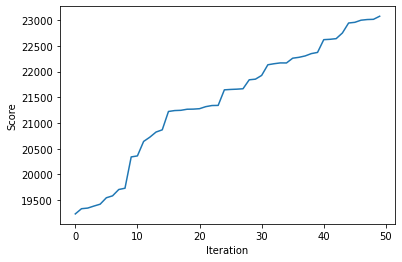

In [454]:
decryptor.plot()

### Часть II. Метрополис-Гастингс как оптимизатор LDA ###